In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.datasets import load_iris

df = load_iris()

In [37]:
X = pd.DataFrame(df.data, columns=df.feature_names)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)


Variance explained by each component: [0.72962445 0.22850762]


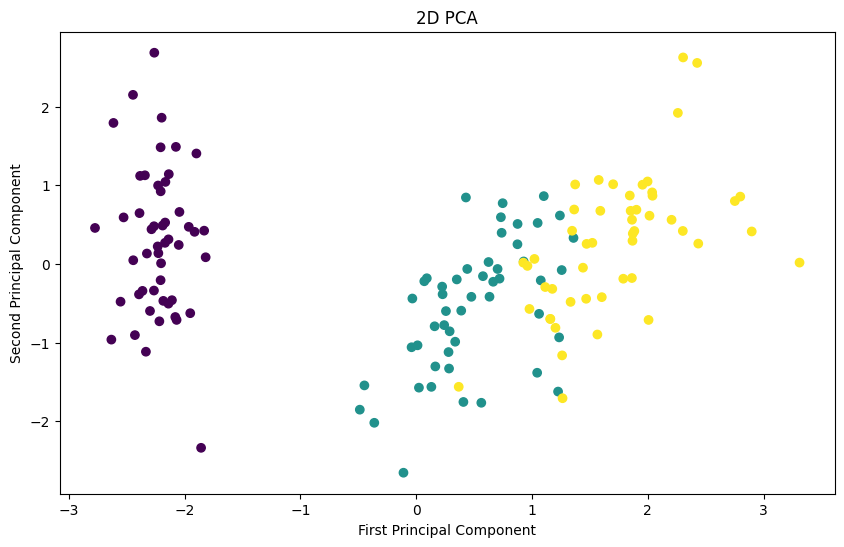

In [39]:
print('Variance explained by each component:', pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA')
plt.show()

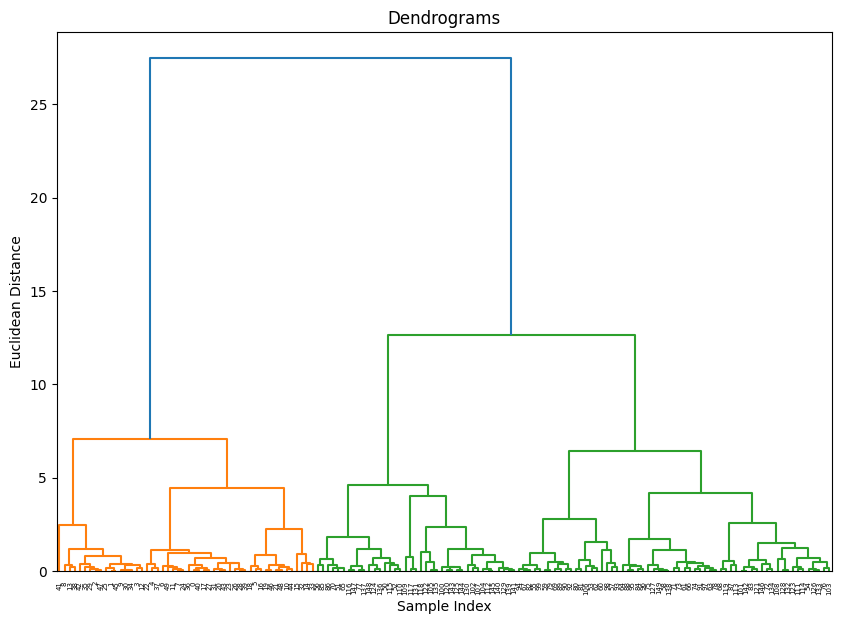

In [40]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title('Dendrograms')
shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


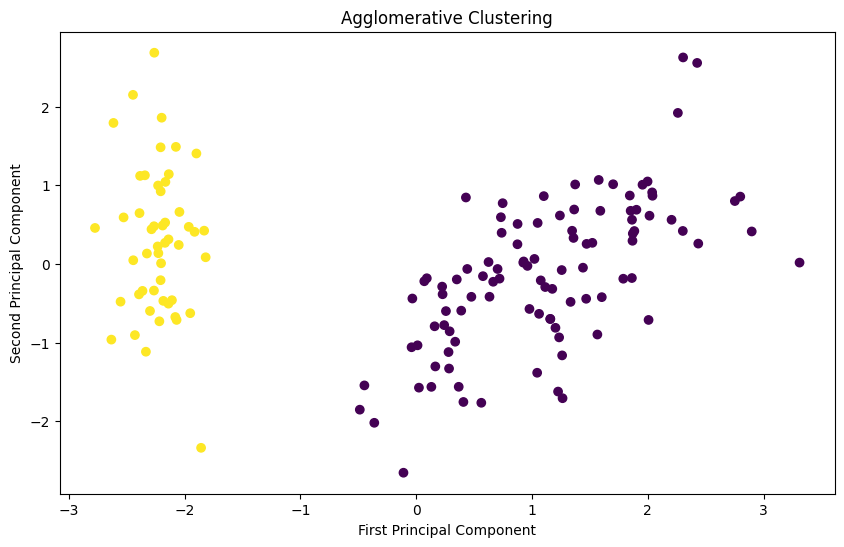

In [41]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)

agg_clusters = agg.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Agglomerative Clustering')
plt.show()


In [42]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)



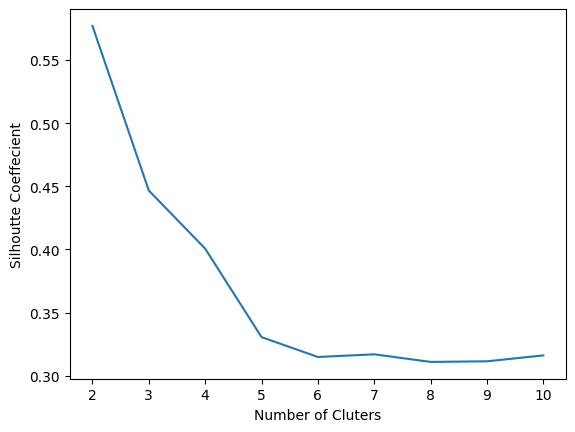

In [43]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()